In [1]:
import shutil
import os

In [2]:
# Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

!apt-get install unrar

!unrar x -Y "/content/gdrive/My Drive/VOC2007.rar"

root_dir = "/content/VOC2007"
annotations_dir = os.path.join(root_dir, "Annotations")
images_dir = os.path.join(root_dir, "JPEGImages")
sets_dir = os.path.join(root_dir, "ImageSets", "Main")
labels_dir = os.path.join(root_dir, "labels")

dest_base_dir = os.path.join(root_dir, "dataset_splits")

Streaming output truncated to the last 5000 lines.
Extracting  VOC2007/labels/005010859.txt                                  99%  OK 
Extracting  VOC2007/labels/005010860.txt                                  99%  OK 
Extracting  VOC2007/labels/005010861.txt                                  99%  OK 
Extracting  VOC2007/labels/005010862.txt                                  99%  OK 
Extracting  VOC2007/labels/005010863.txt                                  99%  OK 
Extracting  VOC2007/labels/005010864.txt                                  99%  OK 
Extracting  VOC2007/labels/005010865.txt                                  99%  OK 
Extracting  VOC2007/labels/005010866.txt                                  99%  OK 
Extracting  VOC2007/labels/005010867.txt                                  99%  OK 
Extracting  VOC2007/labels/005010868.txt                                  99%  OK 
Extracting  VOC2007/labels/00

In [3]:
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(dest_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dest_base_dir, split, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join(dest_base_dir, split, 'labels'), exist_ok=True)

def distribute_files(files, split):
    with open(files, 'r') as f:
        filenames = f.read().splitlines()

        for filename in filenames:
            image_src = os.path.join(images_dir, filename + '.jpg')
            annotation_src = os.path.join(annotations_dir, filename + '.xml')
            label_src = os.path.join(labels_dir, filename + '.txt')  # Assuming a parallel structure for labels

            image_dest = os.path.join(dest_base_dir, split, 'images', filename + '.jpg')
            annotation_dest = os.path.join(dest_base_dir, split, 'annotations', filename + '.xml')
            label_dest = os.path.join(dest_base_dir, split, 'labels', filename + '.txt')  # Destination for labels

            # Move the files
            shutil.copy(image_src, image_dest)
            shutil.copy(annotation_src, annotation_dest)
            shutil.copy(label_src, label_dest)

for split in ['train', 'val', 'test']:
    distribute_files(os.path.join(sets_dir, split + '.txt'), split)

In [4]:
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'images'), exist_ok=True)
    os.makedirs(os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'labels'), exist_ok=True)
    os.makedirs(os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'images'), exist_ok=True)
    os.makedirs(os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'labels'), exist_ok=True)
    os.makedirs(os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'images'), exist_ok=True)
    os.makedirs(os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'labels'), exist_ok=True)

def distribute_files(files, split, dir_type):
    with open(files, 'r') as f:
        filenames = f.read().splitlines()

        for filename in filenames:
            image_src = os.path.join(images_dir, filename + '.jpg')
            annotation_src = os.path.join(annotations_dir, filename + '.xml')
            label_src = os.path.join(labels_dir, filename + '.txt')  # Assuming a parallel structure for labels

            if dir_type == "train":
              image_dest = os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'images', filename + '.jpg')
              annotation_dest = os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'annotations', filename + '.xml')
              label_dest = os.path.join('./coco/train2017/VOC2007/dataset_splits', split, 'labels', filename + '.txt')  # Destination for labels
            if dir_type == "val":
              image_dest = os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'images', filename + '.jpg')
              annotation_dest = os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'annotations', filename + '.xml')
              label_dest = os.path.join('./coco/val2017/VOC2007/dataset_splits', split, 'labels', filename + '.txt')  # Destination for labels
            if dir_type == "test":
              image_dest = os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'images', filename + '.jpg')
              annotation_dest = os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'annotations', filename + '.xml')
              label_dest = os.path.join('./coco/test2017/VOC2007/dataset_splits', split, 'labels', filename + '.txt')  # Destination for labels

            # Move the files
            shutil.copy(image_src, image_dest)
            shutil.copy(annotation_src, annotation_dest)
            shutil.copy(label_src, label_dest)

train_dir_type = "train"
val_dir_type = "val"
test_dir_type = "test"

for split in ['train', 'val', 'test']:
    distribute_files(os.path.join(sets_dir, split + '.txt'), split, train_dir_type)
    distribute_files(os.path.join(sets_dir, split + '.txt'), split, val_dir_type)
    distribute_files(os.path.join(sets_dir, split + '.txt'), split, test_dir_type)

In [5]:
import os
import json
import xml.etree.ElementTree as ET

def xml_to_coco(xml_dir, img_dir, output_json_dir, dir_type):
    # Ensure output directory exists
    os.makedirs(output_json_dir, exist_ok=True)

    if dir_type == "train":
      output_json_file = os.path.join(output_json_dir, "instances_train2017.json")
    if dir_type == "val":
      output_json_file = os.path.join(output_json_dir, "instances_val2017.json")
    if dir_type == "test":
      output_json_file = os.path.join(output_json_dir, "instances_test2017.json")

    coco_data = {
        "images": [],
        "annotations": [],
        "categories": [
            {"id": 1, "name": "bud"},
            {"id": 2, "name": "flower"},
            {"id": 3, "name": "early-fruit"},
            {"id": 4, "name": "mid-growth"},
            {"id": 5, "name": "ripe"}
        ]
    }

    image_id = 0
    annotation_id = 0

    for filename in os.listdir(xml_dir):
        if filename.endswith('.xml'):
            xml_file = os.path.join(xml_dir, filename)
            tree = ET.parse(xml_file)
            root = tree.getroot()

            image_file_name = root.find('filename').text
            # Ensures that the file name in JSON points to the actual image path
            image_file_path = os.path.join(img_dir, image_file_name)

            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            coco_data['images'].append({
                "id": image_id,
                "file_name": image_file_path,  # Save the full path or just the file name as per your requirement
                "width": width,
                "height": height
            })

            for obj in root.findall('object'):
                category = obj.find('name').text
                category_id = next((cat['id'] for cat in coco_data['categories'] if cat['name'] == category), None)

                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                bbox = [xmin, ymin, xmax - xmin, ymax - ymin]

                coco_data['annotations'].append({
                    "id": annotation_id,
                    "image_id": image_id,
                    "category_id": category_id,
                    "bbox": bbox,
                    "area": bbox[2] * bbox[3],
                    "iscrowd": 0
                })

                annotation_id += 1

            image_id += 1

    with open(output_json_file, 'w') as f:
        json.dump(coco_data, f, indent=4)

    print(f"Processed {image_id} images and {annotation_id} annotations.")

train_xml_dir = './VOC2007/dataset_splits/train/annotations/'
train_img_dir = './VOC2007/dataset_splits/train/images/'
train_dir_type = "train"

val_xml_dir = './VOC2007/dataset_splits/val/annotations/'
val_img_dir = './VOC2007/dataset_splits/val/images/'
val_dir_type = "val"

test_xml_dir = './VOC2007/dataset_splits/test/annotations/'
test_img_dir = './VOC2007/dataset_splits/test/images/'
test_dir_type = "test"

output_json_dir = './coco/annotations/'

os.makedirs(output_json_dir, exist_ok=True)

xml_to_coco(train_xml_dir, train_img_dir, output_json_dir, train_dir_type)
xml_to_coco(val_xml_dir, val_img_dir, output_json_dir, val_dir_type)
xml_to_coco(test_xml_dir, test_img_dir, output_json_dir, test_dir_type)

Processed 4685 images and 9218 annotations.
Processed 585 images and 1158 annotations.
Processed 587 images and 1108 annotations.


In [6]:
!pip install pycocotools

In [11]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection

def get_model(num_classes):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes + 1)
    return model

def transform_img(img):
    return F.to_tensor(img)

def bbox_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return intersection_area / float(box1_area + box2_area - intersection_area)

def collate_fn(batch):
    images, targets_list = zip(*batch)
    targets = []
    for target_objs in targets_list:
        batch_targets = {"boxes": [], "labels": []}
        for obj in target_objs:
            xmin, ymin, width, height = obj["bbox"]
            xmax = xmin + width
            ymax = ymin + height
            batch_targets["boxes"].append([xmin, ymin, xmax, ymax])
            batch_targets["labels"].append(obj["category_id"])
        batch_targets["boxes"] = torch.as_tensor(batch_targets["boxes"], dtype=torch.float32)
        batch_targets["labels"] = torch.as_tensor(batch_targets["labels"], dtype=torch.int64)
        targets.append(batch_targets)
    return images, targets

train_dataset = CocoDetection('./coco/train2017', './coco/annotations/instances_train2017.json', transform=transform_img)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_model(num_classes=5)
model.to(device)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
num_epochs = 3

for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")
    model.train()
    image_count = 0
    total_loss = 0.0
    total_iou = 0.0
    correct_labels = 0
    num_detections = 0

    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(images)
            for output, target in zip(outputs, targets):
                pred_boxes = output['boxes']
                pred_labels = output['labels']
                target_boxes = target['boxes']
                target_labels = target['labels']

                for i in range(pred_boxes.size(0)):
                    best_iou = 0
                    best_idx = -1
                    for j in range(target_boxes.size(0)):
                        iou = bbox_iou(pred_boxes[i], target_boxes[j])
                        if iou > best_iou:
                            best_iou = iou
                            best_idx = j
                    if best_iou > 0.5 and pred_labels[i] == target_labels[best_idx]:
                        correct_labels += 1
                    if best_iou > 0.5:
                        num_detections += 1
                        total_iou += best_iou

        model.train()

        total_loss += losses.item()
        image_count += len(images)

        if image_count % 200 == 0 or image_count == len(train_dataset):
            average_loss = total_loss / image_count
            average_iou = total_iou / num_detections if num_detections > 0 else 0
            accuracy = correct_labels / num_detections if num_detections > 0 else 0
            print(f"Progress: {image_count}/{len(train_dataset)}, Average Loss: {average_loss:.4f}, Average IoU: {average_iou:.4f}, Accuracy: {accuracy:.4f}")

print("Training complete.")

Epoch: 0
Progress: 200/4685, Average Loss: 0.4305, Average IoU: 0.6822, Accuracy: 0.2298
Progress: 400/4685, Average Loss: 0.3870, Average IoU: 0.7175, Accuracy: 0.2448
Progress: 600/4685, Average Loss: 0.3523, Average IoU: 0.7349, Accuracy: 0.2576
Progress: 800/4685, Average Loss: 0.3309, Average IoU: 0.7453, Accuracy: 0.2723
Progress: 1000/4685, Average Loss: 0.3210, Average IoU: 0.7487, Accuracy: 0.2867
Progress: 1200/4685, Average Loss: 0.3131, Average IoU: 0.7545, Accuracy: 0.2953
Progress: 1400/4685, Average Loss: 0.2998, Average IoU: 0.7612, Accuracy: 0.3036
Progress: 1600/4685, Average Loss: 0.2879, Average IoU: 0.7667, Accuracy: 0.3125
Progress: 1800/4685, Average Loss: 0.2805, Average IoU: 0.7710, Accuracy: 0.3191
Progress: 2000/4685, Average Loss: 0.2756, Average IoU: 0.7736, Accuracy: 0.3290
Progress: 2200/4685, Average Loss: 0.2707, Average IoU: 0.7765, Accuracy: 0.3345
Progress: 2400/4685, Average Loss: 0.2632, Average IoU: 0.7795, Accuracy: 0.3411
Progress: 2600/4685, Av

In [14]:
test_dataset = CocoDetection('./coco/test2017', './coco/annotations/instances_test2017.json', transform=transform_img)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# Function to evaluate the model
def evaluate_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    total_iou = 0.0
    correct_labels = 0
    num_detections = 0
    total_images = 0

    with torch.no_grad():  # No need to track gradients
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # When evaluating, we don't provide targets to the model function
            outputs = model(images)

            # To compute loss, we need to temporarily switch to training mode
            model.train()
            loss_dict = model(images, targets)  # This should return a dictionary
            model.eval()

            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()
            total_images += len(images)

            # Handling outputs and calculating IoU and accuracy
            for output, target in zip(outputs, targets):
                pred_boxes = output['boxes']
                pred_labels = output['labels']
                target_boxes = target['boxes']
                target_labels = target['labels']

                for i in range(pred_boxes.size(0)):
                    best_iou = 0
                    best_idx = -1
                    for j in range(target_boxes.size(0)):
                        iou = bbox_iou(pred_boxes[i], target_boxes[j])
                        if iou > best_iou:
                            best_iou = iou
                            best_idx = j
                    if best_iou > 0.5:
                        total_iou += best_iou
                        num_detections += 1
                        if pred_labels[i] == target_labels[best_idx]:
                            correct_labels += 1

    average_loss = total_loss / total_images if total_images > 0 else 0
    average_iou = total_iou / num_detections if num_detections > 0 else 0
    accuracy = correct_labels / num_detections if num_detections > 0 else 0
    print(f"Test Results - Average Loss: {average_loss:.4f}, Average IoU: {average_iou:.4f}, Accuracy: {accuracy:.4f}")

# Running the evaluation
print("Starting evaluation on testing data...")
evaluate_model(model, test_loader)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Starting evaluation on testing data...
Test Results - Average Loss: 0.1497, Average IoU: 0.8446, Accuracy: 0.5727


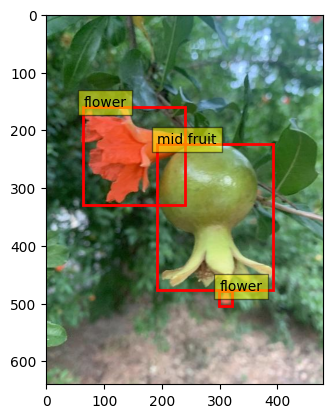

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(image_path):
    img = Image.open(image_path).convert("RGB")
    return img

def predict_and_visualize_image(model, device, image_path, detection_threshold=0.5):
    # Class label definitions
    class_names = ['background', 'bud', 'flower', 'early fruit', 'mid fruit', 'ripe']  # Include background at index 0 if necessary

    # Load and transform the image
    img = load_image(image_path)
    img_tensor = F.to_tensor(img).unsqueeze_(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)

    # Put the model in evaluation mode and make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)

    # Process outputs
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
    pred_boxes = outputs[0]['boxes']
    pred_scores = outputs[0]['scores']
    pred_labels = outputs[0]['labels']

    # Filter out predictions with low confidence
    filtered_indices = pred_scores > detection_threshold
    pred_boxes = pred_boxes[filtered_indices]
    pred_scores = pred_scores[filtered_indices]
    pred_labels = pred_labels[filtered_indices]

    # Draw the image and the predicted boxes
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for box, label in zip(pred_boxes, pred_labels):
        xmin, ymin, xmax, ymax = box
        label_text = class_names[label.item()]  # Get the corresponding class name
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, label_text, bbox=dict(facecolor='yellow', alpha=0.5), clip_on=True)

    plt.show()

# Assuming model and device are already defined and set up
image_path = "./VOC2007/dataset_splits/test/images/006073160.jpg"
predict_and_visualize_image(model, device, image_path)